# Consumer complaints multi classification


* The dataset is from kaggle, you can check here : https://www.kaggle.com/shashwatwork/consume-complaints-dataset-fo-nlp
* We will use consumer narrative as an input and the output is 5 different product type.

> We will run 4 different modeling experiment with different models and save the best model based on evaluation metrics.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dataset = pd.read_csv("../input/consume-complaints-dataset-fo-nlp/complaints_processed.csv")
dataset

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [3]:
dataset[dataset['narrative'] == "name"]

,Unnamed: 0,product,narrative
162415,162415,debt_collection,name
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name
162420,162420,credit_reporting,name


In [4]:
dataset['product'].value_counts()

credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64

In [5]:
dataset.isna().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [6]:
del dataset['Unnamed: 0']

In [7]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name


In [8]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.isna().sum()

product      0
narrative    0
dtype: int64

In [9]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name


In [10]:
dataset[dataset['narrative'] == "name"]

,product,narrative
162405,debt_collection,name
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name
162410,credit_reporting,name


In [11]:
dataset = dataset[dataset['narrative'] != "name"]
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162400,credit_reporting,zales comenity bank closed sold account report...
162401,retail_banking,zelle suspended account without cause banking ...
162402,debt_collection,zero contact made debt supposedly resolved fou...
162403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [12]:
dataset['product'].value_counts()

credit_reporting       91171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

In [13]:
91171-66000

25171

In [14]:
dataset[dataset['product'] == "credit_reporting"].index

Int64Index([     3,      4,      5,      6,      7,      8,      9,     13,
                19,     20,
            ...
            162378, 162384, 162387, 162388, 162389, 162391, 162393, 162395,
            162396, 162400],
           dtype='int64', length=91171)

In [15]:
# reduce credit reporting data to make dataset quite balance
np.random.seed(42)
remove_n = 66000
drop_indices = np.random.choice(dataset[dataset['product'] == "credit_reporting"].index, remove_n, replace=False)
dataset_balance = dataset.drop(drop_indices)
dataset_balance.reset_index(drop=True, inplace=True)
dataset_balance

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report made mis...
4,credit_reporting,account reported abbreviated name full name se...
...,...,...
96400,retail_banking,yr thru expecting monies account deposit dolla...
96401,retail_banking,zelle suspended account without cause banking ...
96402,debt_collection,zero contact made debt supposedly resolved fou...
96403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [16]:
dataset_balance['product'].value_counts()

credit_reporting       25171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

In [17]:
dataset_balance['product'].value_counts() * 100/len(dataset_balance)

credit_reporting       26.109642
debt_collection        24.008091
mortgages_and_loans    19.698148
credit_card            16.144391
retail_banking         14.039728
Name: product, dtype: float64

In [18]:
# use only 20% of balanced dataset
dataset_shuffled = dataset_balance.sample(frac=0.2, random_state=42)
dataset_shuffled

,product,narrative
40398,debt_collection,received bill linebarger hogan blair sampson u...
33056,debt_collection,lived house house fall spring fist year univer...
14813,retail_banking,hello mistakenly sent wrong person cashapp per...
12687,credit_reporting,year disputed account reported year duplicatio...
27393,credit_reporting,two car loan paid early making large payment e...
...,...,...
76845,credit_reporting,synovus bank prior dispute credit report showe...
29531,credit_card,attached copy report ton account account owe a...
86548,retail_banking,today declined service md branch even though p...
62012,mortgages_and_loans,contacted spoke wxxxx expressed concern able r...


In [19]:
dataset_shuffled['product'].value_counts()

credit_reporting       4993
debt_collection        4672
mortgages_and_loans    3816
credit_card            3061
retail_banking         2739
Name: product, dtype: int64

In [20]:
len(dataset_shuffled)

19281

In [21]:
import random

In [22]:
# show random samples
random_index = random.randint(0, len(dataset_shuffled)-5)
for row in dataset_shuffled[["product", "narrative"]][random_index:random_index+5].itertuples():
    _, product, narrative = row
    print(f"Narrative: {narrative}")
    print(f"Type: \n{product}\n")
    print("-----------------------")

Narrative: disputed unauthorized charge prior charge card balance limit credit score next day wrongly reported card balance placing limit day later credit score dropped also suspicious note account always reported month would report almost week early contacted told unauthorized charge still investigated one could answer reported credit bureau reported early reckless violation fcba fcra numerous state michigan consumer protection law believe deliberately reported inaccurate balance applied ppp loan relief bill save received call today denied large part due recent negative furnishing loan officer said needed score limit recently reported significant likely dissolve
Type: 
credit_reporting

-----------------------
Narrative: victim identity notified collection creditor several time account belong way received good service company provided police report ftc id theft affidavit signed notarized along sworn statement regarding fraudulent account document submitted credit bureau
Type: 
credit_

In [23]:
dataset_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19281 entries, 40398 to 19376
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   product    19281 non-null  object
 1   narrative  19281 non-null  object
dtypes: object(2)
memory usage: 451.9+ KB


In [24]:
product_categories = dataset_shuffled['product'].value_counts().keys().to_list()
product_categories

['credit_reporting',
 'debt_collection',
 'mortgages_and_loans',
 'credit_card',
 'retail_banking']

In [25]:
product_categories

['credit_reporting',
 'debt_collection',
 'mortgages_and_loans',
 'credit_card',
 'retail_banking']

In [26]:
# turn target column into category datatype
dataset_shuffled['product'] = dataset_shuffled['product'].astype("category").cat.as_ordered()
dataset_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19281 entries, 40398 to 19376
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   product    19281 non-null  category
 1   narrative  19281 non-null  object  
dtypes: category(1), object(1)
memory usage: 320.3+ KB


In [27]:
dataset_shuffled['product'].cat.categories

Index(['credit_card', 'credit_reporting', 'debt_collection',
       'mortgages_and_loans', 'retail_banking'],
      dtype='object')

In [28]:
dataset_shuffled['product'] = dataset_shuffled['product'].cat.codes
dataset_shuffled

,product,narrative
40398,2,received bill linebarger hogan blair sampson u...
33056,2,lived house house fall spring fist year univer...
14813,4,hello mistakenly sent wrong person cashapp per...
12687,1,year disputed account reported year duplicatio...
27393,1,two car loan paid early making large payment e...
...,...,...
76845,1,synovus bank prior dispute credit report showe...
29531,0,attached copy report ton account account owe a...
86548,4,today declined service md branch even though p...
62012,3,contacted spoke wxxxx expressed concern able r...


# Split data into training and validation set

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
X = dataset_shuffled['narrative'].to_numpy()
y = dataset_shuffled['product'].to_numpy()

In [31]:
train_text, val_text, train_label, val_label = train_test_split(X, y, test_size=0.2, random_state=42)
train_text.shape, val_text.shape, train_label.shape, val_label.shape

((15424,), (3857,), (15424,), (3857,))

In [32]:
train_label[:10]

array([2, 4, 0, 3, 1, 2, 0, 2, 2, 3], dtype=int8)

# Converting text into numbers

In [33]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [34]:
text_vectorizer = TextVectorization(max_tokens=None, standardize="lower_and_strip_punctuation", split="whitespace", 
                                   ngrams=None, output_mode="int", output_sequence_length=None, pad_to_max_tokens=True)

In [35]:
# find the average number of tokens (words)
round(sum([len(i.split()) for i in train_text])/len(train_text))

89

In [36]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = round(sum([len(i.split()) for i in train_text])/len(train_text))

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)

In [37]:
# fit text vectorizer to the training set
text_vectorizer.adapt(train_text)

In [38]:
# create sample sentence and tokenize it
sample_sentence = "How do I know what my current credit score is??????"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 89), dtype=int64, numpy=
array([[  1,   1,   1,  79,   1,   1, 214,   3, 147,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [39]:
random_sample = [random.choice(train_text)]
print(f"Text sample: {random_sample}")
text_vectorizer(random_sample)

Text sample: ['consolidated loan total number eligible payment incorrect close eligible payment listed le loan serviced fedloans']


<tf.Tensor: shape=(1, 89), dtype=int64, numpy=
array([[2116,    9,  300,   33, 1026,    4,  324,  222, 1026,    4,  235,
         555,    9, 1516, 4017,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>

In [40]:
# get the unique words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number vocab in words: {len(words_in_vocab)}")
print(f"Top 5 common words: {top_5_words}")
print(f"Least 5 common words: {bottom_5_words}")

Number vocab in words: 10000
Top 5 common words: ['', '[UNK]', 'account', 'credit', 'payment']
Least 5 common words: ['recmgmt', 'reclining', 'reclassified', 'reclaiming', 'reclaimed']


# Creating an embedding layer

In [41]:
from tensorflow.keras import layers

In [42]:
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=128, input_length=max_length)
embedding

In [43]:
random_sentence = random.choice(train_text)
print(f"Original text: \n{random_sentence}\n")
print(f"Embedded version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
loan always made payment time see always stellar payment record company tried contacting midlandmcm successful resolution definitely error part

Embedded version:


<tf.Tensor: shape=(1, 89, 128), dtype=float32, numpy=
array([[[-0.0006141 , -0.04868459, -0.00924401, ...,  0.00057166,
         -0.00867869,  0.02366325],
        [ 0.00515841, -0.03994466,  0.03286422, ..., -0.00092936,
          0.00867458,  0.01695434],
        [ 0.04719071,  0.01201837, -0.00476249, ..., -0.02713143,
          0.0010046 ,  0.01587142],
        ...,
        [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
         -0.00769454,  0.0018401 ],
        [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
         -0.00769454,  0.0018401 ],
        [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
         -0.00769454,  0.0018401 ]]], dtype=float32)>

In [44]:
sample_embed[0]

<tf.Tensor: shape=(89, 128), dtype=float32, numpy=
array([[-0.0006141 , -0.04868459, -0.00924401, ...,  0.00057166,
        -0.00867869,  0.02366325],
       [ 0.00515841, -0.03994466,  0.03286422, ..., -0.00092936,
         0.00867458,  0.01695434],
       [ 0.04719071,  0.01201837, -0.00476249, ..., -0.02713143,
         0.0010046 ,  0.01587142],
       ...,
       [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
        -0.00769454,  0.0018401 ],
       [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
        -0.00769454,  0.0018401 ],
       [ 0.04944928, -0.03152173, -0.03297409, ...,  0.0412518 ,
        -0.00769454,  0.0018401 ]], dtype=float32)>

# Modeling text dataset : Baseline model

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [46]:
# create tokenization and modelling pipeline
model_0 = Pipeline([
            ("tfidf", TfidfVectorizer()),
            ("clf", MultinomialNB())
])

# fit pipeline to the training data
model_0.fit(train_text, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [47]:
# Evaluate baseline model
baseline_score = model_0.score(val_text, val_label)
print(f"Accuracy score: {baseline_score*100:.2f}%")

Accuracy score: 79.21%


In [48]:
# make predictions 
baseline_preds = model_0.predict(val_text)
baseline_preds[:20]

array([3, 1, 2, 3, 0, 2, 1, 0, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 3, 3],
      dtype=int8)

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [50]:
def calculate_result(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)*100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy, 
                    "precision": model_precision, 
                    "recall": model_recall, 
                    "f1-score": model_f1}
    return model_results

In [51]:
# get baseline results
baseline_results = calculate_result(val_label, baseline_preds)
baseline_results

{'accuracy': 79.20663728286232,
 'precision': 0.7989211841537888,
 'recall': 0.7920663728286232,
 'f1-score': 0.7918007535543574}

# Model 1 : Dense model

In [52]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

# create tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard log files to: {log_dir}.")
  return tensorboard_callback

In [53]:
from tensorflow.keras import layers

In [54]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Dense(128,activation="relu")(x) # add extra dense layer
x = layers.Dense(64,activation="relu")(x) # add extra dense layer
x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 89)                0         
_________________________________________________________________
embedding (Embedding)        (None, 89, 128)           1280000   
_________________________________________________________________
dense (Dense)                (None, 89, 64)            8256      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,288,581
Trainable params: 1,288,581
Non-trainable params: 0
___________________________________________

In [55]:
model_1.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [56]:
history_model_1 = model_1.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                              callbacks=[
                                  create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                             experiment_name="model_1_dense")
                              ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_1_dense/20210711-050049.
Epoch 1/5
482/482 [==============================] - 10s 18ms/step - loss: 1.2478 - accuracy: 0.5089 - val_loss: 0.6296 - val_accuracy: 0.8115
Epoch 2/5
482/482 [==============================] - 7s 15ms/step - loss: 0.5442 - accuracy: 0.8326 - val_loss: 0.5850 - val_accuracy: 0.8170
Epoch 3/5
482/482 [==============================] - 7s 15ms/step - loss: 0.4413 - accuracy: 0.8685 - val_loss: 0.5801 - val_accuracy: 0.8203
Epoch 4/5
482/482 [==============================] - 7s 16ms/step - loss: 0.3696 - accuracy: 0.8835 - val_loss: 0.5849 - val_accuracy: 0.8146
Epoch 5/5
482/482 [==============================] - 8s 17ms/step - loss: 0.3118 - accuracy: 0.9100 - val_loss: 0.6073 - val_accuracy: 0.8133


In [57]:
model_1.evaluate(val_text, val_label)

121/121 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.8133


[0.6073218584060669, 0.8133264183998108]

In [58]:
model_1_probs = model_1.predict(val_text)

In [59]:
model_1_probs

array([[2.8090619e-03, 2.2412749e-02, 3.4553814e-01, 6.2886447e-01,
        3.7555670e-04],
       [4.6451318e-01, 4.2858079e-02, 4.2068165e-02, 4.2949545e-01,
        2.1065164e-02],
       [2.8719794e-02, 1.2208474e-01, 8.2766193e-01, 9.7370464e-03,
        1.1796443e-02],
       ...,
       [3.6246486e-03, 9.1213718e-02, 8.8407600e-01, 2.0989165e-02,
        9.6556731e-05],
       [2.3486445e-02, 2.9837405e-02, 5.9053195e-01, 3.3886990e-01,
        1.7274259e-02],
       [6.8055947e-06, 7.1279079e-05, 9.8995086e-05, 9.9981648e-01,
        6.4727915e-06]], dtype=float32)

In [60]:
model_1_preds = model_1_probs.argmax(axis=1)
model_1_preds.shape

(3857,)

In [61]:
model_1_results = calculate_result(val_label, model_1_preds)
model_1_results

{'accuracy': 81.33264194970184,
 'precision': 0.8141643617710997,
 'recall': 0.8133264194970184,
 'f1-score': 0.8126229143543832}

# Model 2 : 1-D CNN

In [62]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=128, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_conv1d")

model_2.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_2.summary()

Model: "model_2_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 89)                0         
_________________________________________________________________
embedding (Embedding)        (None, 89, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 85, 128)           82048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 64)            41024     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)              

In [63]:
history_model_2 = model_2.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_2_conv1d")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_2_conv1d/20210711-050131.
Epoch 1/5
482/482 [==============================] - 14s 18ms/step - loss: 0.5289 - accuracy: 0.8181 - val_loss: 0.5812 - val_accuracy: 0.8123
Epoch 2/5
482/482 [==============================] - 8s 16ms/step - loss: 0.2475 - accuracy: 0.9214 - val_loss: 0.6440 - val_accuracy: 0.7998
Epoch 3/5
482/482 [==============================] - 8s 17ms/step - loss: 0.1849 - accuracy: 0.9412 - val_loss: 0.7662 - val_accuracy: 0.7908
Epoch 4/5
482/482 [==============================] - 8s 16ms/step - loss: 0.1386 - accuracy: 0.9587 - val_loss: 0.8200 - val_accuracy: 0.7887
Epoch 5/5
482/482 [==============================] - 8s 16ms/step - loss: 0.1062 - accuracy: 0.9697 - val_loss: 0.9452 - val_accuracy: 0.7928


In [64]:
model_2.evaluate(val_text, val_label)

121/121 [==============================] - 0s 4ms/step - loss: 0.9452 - accuracy: 0.7928


[0.9451600313186646, 0.7928441762924194]

In [65]:
model_2_probs = model_2.predict(val_text)
model_2_preds = model_2_probs.argmax(axis=1)
model_2_preds.shape

(3857,)

In [66]:
model_2_results = calculate_result(val_label, model_2_preds)
model_2_results

{'accuracy': 79.28441794140524,
 'precision': 0.7941446999215205,
 'recall': 0.7928441794140524,
 'f1-score': 0.7924013990467531}

# Model 3 : USE model

In [67]:
# use tensorflow hub models for transfer learning
import tensorflow_hub as hub

In [68]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", name="USE")

In [69]:
model_3 = tf.keras.Sequential([
    sentence_encoder_layer, 
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_3_USE")

model_3.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_3.summary()

Model: "model_3_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 33,157
Non-trainable params: 256,797,824
_________________________________________________________________


In [70]:
history_model_3 = model_3.fit(train_text, train_label, epochs=10, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_3_USE")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_3_USE/20210711-050236.
Epoch 1/10
482/482 [==============================] - 19s 34ms/step - loss: 1.0420 - accuracy: 0.6591 - val_loss: 0.6359 - val_accuracy: 0.7750
Epoch 2/10
482/482 [==============================] - 15s 31ms/step - loss: 0.6118 - accuracy: 0.7846 - val_loss: 0.6045 - val_accuracy: 0.7773
Epoch 3/10
482/482 [==============================] - 14s 29ms/step - loss: 0.5775 - accuracy: 0.7972 - val_loss: 0.5916 - val_accuracy: 0.7908
Epoch 4/10
482/482 [==============================] - 14s 30ms/step - loss: 0.5427 - accuracy: 0.8092 - val_loss: 0.5834 - val_accuracy: 0.7947
Epoch 5/10
482/482 [==============================] - 14s 30ms/step - loss: 0.5319 - accuracy: 0.8137 - val_loss: 0.5812 - val_accuracy: 0.7967
Epoch 6/10
482/482 [==============================] - 14s 29ms/step - loss: 0.5299 - accuracy: 0.8125 - val_loss: 0.5753 - val_accuracy: 0.7952
Epoch 7/10
482/482 [=============================

In [71]:
model_3.evaluate(val_text, val_label)

121/121 [==============================] - 3s 22ms/step - loss: 0.5801 - accuracy: 0.7962


[0.5800842046737671, 0.7962146997451782]

In [72]:
model_3_probs = model_3.predict(val_text)
model_3_preds = model_3_probs.argmax(axis=1)
model_3_preds.shape

(3857,)

In [73]:
model_3_results = calculate_result(val_label, model_3_preds)
model_3_results

{'accuracy': 79.62146746175785,
 'precision': 0.7983752904015896,
 'recall': 0.7962146746175784,
 'f1-score': 0.7959763220191964}

# Model 4 : USE fine tune

In [74]:
sentence_encoder_layer_tuned = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", trainable=True, name="USE")

In [75]:
model_4 = tf.keras.Sequential([
    sentence_encoder_layer_tuned, 
#     layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_4_USE_tuned")

model_4.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_4.summary()

Model: "model_4_USE_tuned"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 256,830,981
Non-trainable params: 0
_________________________________________________________________


In [76]:
history_model_4 = model_4.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_4_USE_tuned")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_4_USE_tuned/20210711-050515.
Epoch 1/5
482/482 [==============================] - 54s 101ms/step - loss: 0.8815 - accuracy: 0.6936 - val_loss: 0.5211 - val_accuracy: 0.8144
Epoch 2/5
482/482 [==============================] - 47s 97ms/step - loss: 0.2347 - accuracy: 0.9229 - val_loss: 0.5890 - val_accuracy: 0.8172
Epoch 3/5
482/482 [==============================] - 46s 96ms/step - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.6818 - val_accuracy: 0.8170
Epoch 4/5
482/482 [==============================] - 46s 95ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.7396 - val_accuracy: 0.8180
Epoch 5/5
482/482 [==============================] - 46s 96ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.8007 - val_accuracy: 0.8100


In [77]:
model_4.evaluate(val_text, val_label)

121/121 [==============================] - 3s 22ms/step - loss: 0.8007 - accuracy: 0.8100


[0.8006907105445862, 0.809955894947052]

In [78]:
model_4_probs = model_4.predict(val_text)
model_4_preds = model_4_probs.argmax(axis=1)
model_4_preds.shape

(3857,)

In [79]:
model_4_results = calculate_result(val_label, model_4_preds)
model_4_results

{'accuracy': 80.99559242934924,
 'precision': 0.8150875379686585,
 'recall': 0.8099559242934924,
 'f1-score': 0.8098047589093742}

# Comparing models

In [80]:
all_model_results = pd.DataFrame({
    "baseline model NaiveBayes": baseline_results, 
    "Dense model": model_1_results, 
    "1D Conv model": model_2_results, 
    "USE model": model_3_results, 
    "USE fine tuned model": model_4_results
}).transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline model NaiveBayes,79.206637,0.798921,0.792066,0.791801
Dense model,81.332642,0.814164,0.813326,0.812623
1D Conv model,79.284418,0.794145,0.792844,0.792401
USE model,79.621467,0.798375,0.796215,0.795976
USE fine tuned model,80.995592,0.815088,0.809956,0.809805


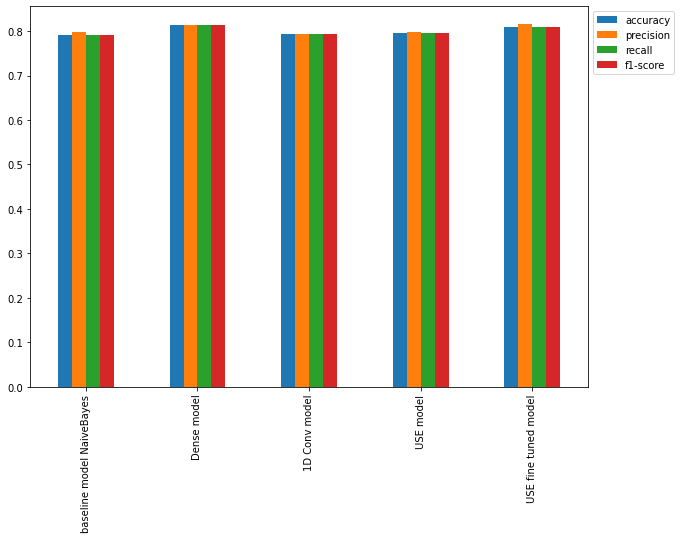

In [81]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

**Notes:**

It seems fine tuned transfer learning with USE model is the best performing model. But dense model can still be improved and another model can be trained for longer epochs. 